# Data Exploration

Exploring the GoEmotions dataset to understand the data structure and distribution.


## Import Libraries


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
os.makedirs('../results/figures', exist_ok=True)


## Load Data


In [53]:
train_df = pd.read_csv('../data/raw/train_raw.csv')
val_df = pd.read_csv('../data/raw/val_raw.csv')
test_df = pd.read_csv('../data/raw/test_raw.csv')

print(f"Train: {train_df.shape}")
print(f"Val: {val_df.shape}")
print(f"Test: {test_df.shape}")
print(f"Total: {len(train_df) + len(val_df) + len(test_df):,}")


Train: (43410, 2)
Val: (5426, 2)
Test: (5427, 2)
Total: 54,263


## Basic Data Check


In [54]:
train_df.head()


,text,emotion
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger


In [55]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     43410 non-null  object
 1   emotion  43410 non-null  object
dtypes: object(2)
memory usage: 678.4+ KB


In [56]:
print("Missing values:")
print(train_df.isnull().sum().sum())
print("\nDuplicates:")
print(f"Train: {train_df.duplicated().sum()}")
print(f"Val: {val_df.duplicated().sum()}")
print(f"Test: {test_df.duplicated().sum()}")


Missing values:
0

Duplicates:
Train: 146
Val: 3
Test: 5


## Emotion Distribution


In [57]:
emotion_counts = train_df['emotion'].value_counts()
emotion_percentages = train_df['emotion'].value_counts(normalize=True) * 100

emotion_df = pd.DataFrame({
    'Count': emotion_counts,
    'Percentage': emotion_percentages.round(2)
})
print(emotion_df)


          Count  Percentage
emotion                    
neutral   23283       53.64
joy        9076       20.91
anger      5336       12.29
sadness    2371        5.46
surprise   2149        4.95
fear        615        1.42
disgust     580        1.34


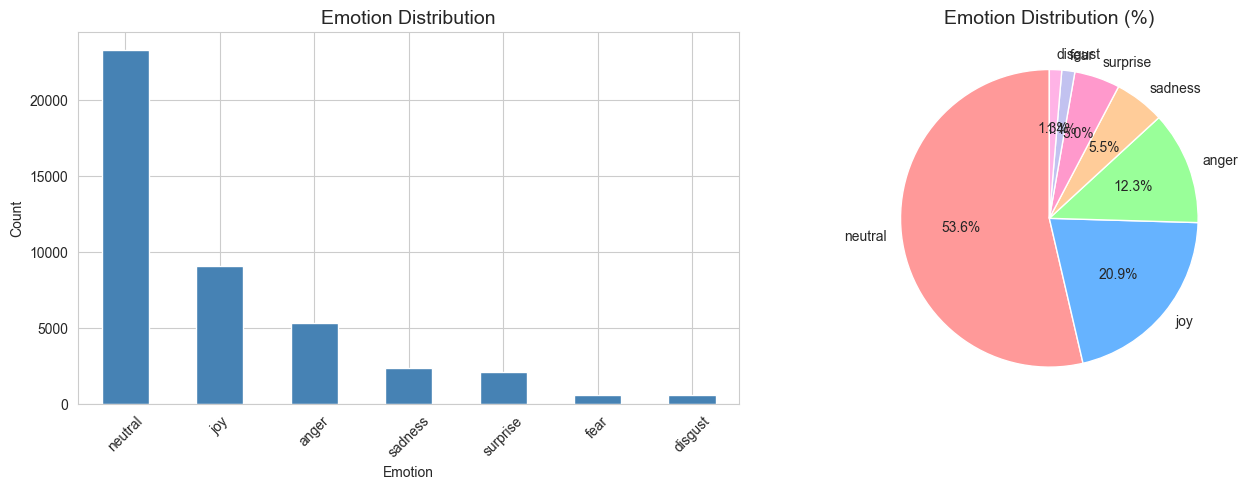

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

emotion_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Emotion Distribution', fontsize=14)
axes[0].set_xlabel('Emotion')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0', '#ffb3e6']
axes[1].pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Emotion Distribution (%)', fontsize=14)

plt.tight_layout()
plt.savefig('../results/figures/emotion_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [59]:
max_count = emotion_counts.max()
min_count = emotion_counts.min()
imbalance_ratio = max_count / min_count

print(f"Most common: {emotion_counts.idxmax()} ({max_count:,} samples)")
print(f"Least common: {emotion_counts.idxmin()} ({min_count:,} samples)")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 3:
    print("Note: Severe class imbalance - will need to handle this during training")


Most common: neutral (23,283 samples)
Least common: disgust (580 samples)
Imbalance ratio: 40.14:1
Note: Severe class imbalance - will need to handle this during training


## Text Length Analysis


In [60]:
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()

print("Text length statistics:")
print(train_df[['text_length', 'word_count']].describe())


Text length statistics:
        text_length    word_count
count  43410.000000  43410.000000
mean      68.400875     12.840175
std       36.721898      6.701597
min        2.000000      1.000000
25%       38.000000      7.000000
50%       65.000000     12.000000
75%       96.000000     18.000000
max      703.000000     33.000000


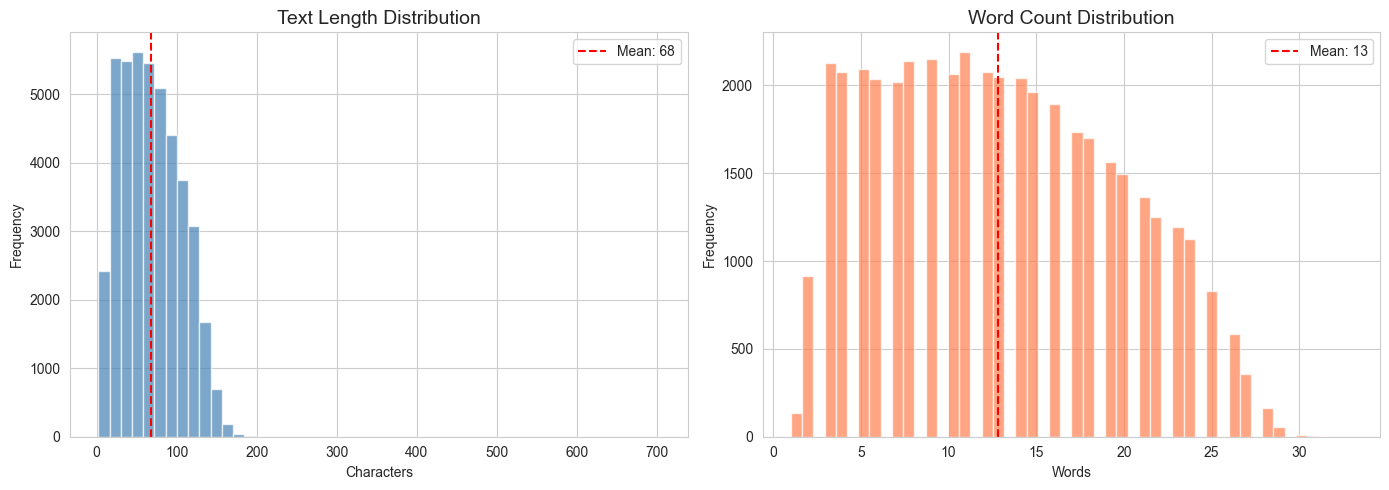

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['text_length'], bins=50, color='steelblue', alpha=0.7)
axes[0].set_title('Text Length Distribution', fontsize=14)
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["text_length"].mean():.0f}')
axes[0].legend()

axes[1].hist(train_df['word_count'], bins=50, color='coral', alpha=0.7)
axes[1].set_title('Word Count Distribution', fontsize=14)
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["word_count"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../results/figures/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


## Sample Texts


In [62]:
for emotion in sorted(train_df['emotion'].unique()):
    print(f"\n{emotion.upper()}:")
    samples = train_df[train_df['emotion'] == emotion]['text'].sample(n=2, random_state=42)
    for text in samples:
        print(f"  - {text}")



ANGER:
  - Everyone’s freaking out about our OC. Our need for O-line is more substantial imo
  - I'd also report to the post office... and next time these nasty neighbors come-give them the number to call and complain.

DISGUST:
  - worst is when people with dogs think they know what it's like to be a parent omg like you dont even know YOU DONT EVEN KNOW
  - You are so ugly even tears wont show up near you

FEAR:
  - Nowadays I get nervous watching Steelers defense. Back then, I couldn't wait to see what they'd do next.
  - It's seriously terrifying!

JOY:
  - Funny how you're implying he'd even have a chance against [NAME]
  - Lol same actually

NEUTRAL:
  - The Democrats do not want to give [NAME] any victory at all that is a simple reason why they oppose the wall now.
  - What a save!

SADNESS:
  - “I am going to be going through a nasty divorce in a few years so I will need the money.” - [NAME]
  - I'm crying.

SURPRISE:
  - Maybe. It's an interesting theory for sure :)
  - Was it

## Word Frequency


In [63]:
from collections import Counter
import re

def get_word_frequencies(texts, top_n=20):
    all_text = ' '.join(texts.astype(str))
    words = re.findall(r'\b[a-z]+\b', all_text.lower())
    word_freq = Counter(words)
    return word_freq.most_common(top_n)

top_words = get_word_frequencies(train_df['text'], top_n=15)

for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:15s} - {count:6,}")


 1. i               - 20,775
 2. the             - 17,994
 3. to              - 12,600
 4. a               - 12,357
 5. you             - 11,458
 6. it              - 10,640
 7. that            -  9,771
 8. and             -  9,036
 9. is              -  8,472
10. name            -  7,907
11. s               -  7,289
12. of              -  7,121
13. this            -  6,554
14. t               -  6,245
15. in              -  5,824


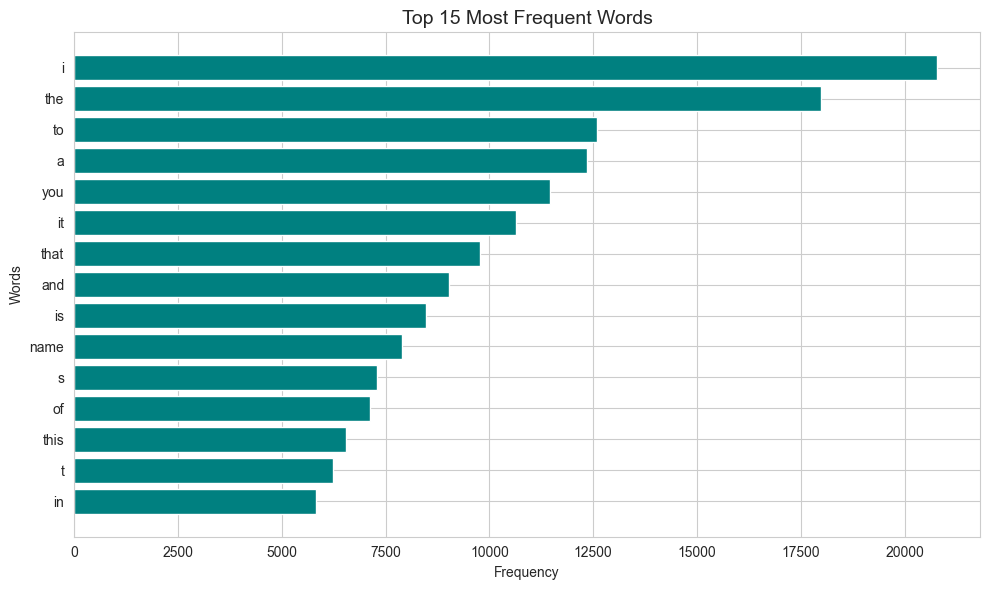

In [64]:
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='teal')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 15 Most Frequent Words', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../results/figures/top_words.png', dpi=300, bbox_inches='tight')
plt.show()


## Dataset Split Comparison


          Train (%)  Val (%)  Test (%)
emotion                               
anger         12.29    12.62     12.95
disgust        1.34     1.36      1.55
fear           1.42     1.57      1.66
joy           20.91    22.48     20.43
neutral       53.64    52.19     52.87
sadness        5.46     4.99      5.29
surprise       4.95     4.77      5.25


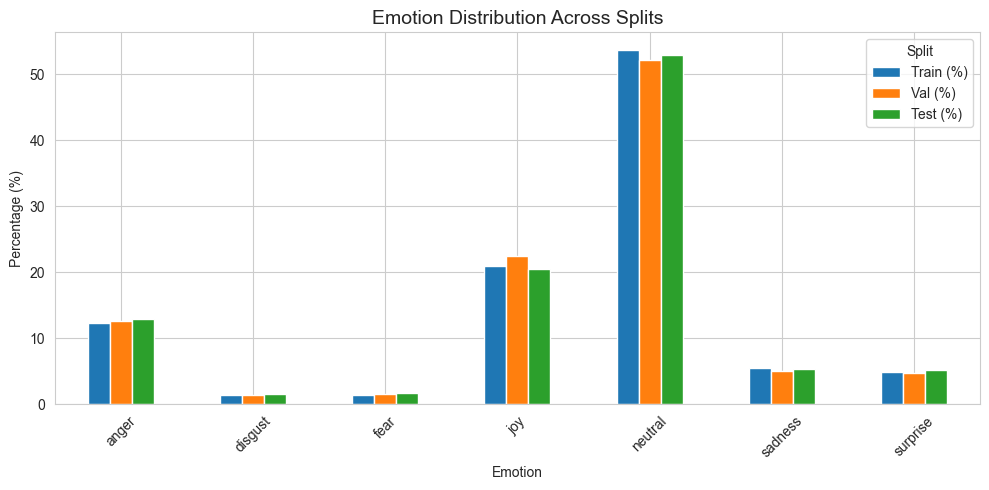

In [65]:
train_dist = train_df['emotion'].value_counts(normalize=True).sort_index() * 100
val_dist = val_df['emotion'].value_counts(normalize=True).sort_index() * 100
test_dist = test_df['emotion'].value_counts(normalize=True).sort_index() * 100

comparison_df = pd.DataFrame({
    'Train (%)': train_dist,
    'Val (%)': val_dist,
    'Test (%)': test_dist
}).round(2)

print(comparison_df)

comparison_df.plot(kind='bar', figsize=(10, 5))
plt.title('Emotion Distribution Across Splits', fontsize=14)
plt.xlabel('Emotion')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Split')
plt.tight_layout()
plt.savefig('../results/figures/split_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## Summary


In [66]:
print("Dataset Summary:")
print(f"Total samples: {len(train_df) + len(val_df) + len(test_df):,}")
print(f"Training: {len(train_df):,} | Validation: {len(val_df):,} | Test: {len(test_df):,}")
print(f"\nEmotions: {len(emotion_counts)} classes")
print(f"Most common: {emotion_counts.idxmax()} ({emotion_counts.max():,})")
print(f"Least common: {emotion_counts.idxmin()} ({emotion_counts.min():,})")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"\nAvg text length: {train_df['text_length'].mean():.0f} chars, {train_df['word_count'].mean():.1f} words")
print(f"Missing values: {train_df.isnull().sum().sum()}")
print(f"Duplicates: {train_df.duplicated().sum()}")


Dataset Summary:
Total samples: 54,263
Training: 43,410 | Validation: 5,426 | Test: 5,427

Emotions: 7 classes
Most common: neutral (23,283)
Least common: disgust (580)
Imbalance ratio: 40.14:1

Avg text length: 68 chars, 12.8 words
Missing values: 0
Duplicates: 146
